# 1 DataFrame基本介绍

**DateFrame**是一个二维带标签（行，列）的数据结构

- 每一列可以是不同的数据类型
- 可通过标签或索引快速访问和操作数据
- 是一个类似Excel的数据结构

|    | 列1 | 列2 | 列3 |
|----|----|----|----|
| 行1 | v  | v  | v  |
| 行2 | v  | v  | v  |
| 行3 | v  | v  | v  |

DataFrame的组成部分

- 数据
- 行索引（index）：每一行的标签
- 列标签（columns）：每一列的标签用于访问列

# 2 DataFrame的创建

## 2.1 从字典创建

字典的键成为DataFrame的列名，值成为列数据

In [ ]:
from A基础.基本数据结构 import my_dict
!pip install pandas

In [3]:
import pandas as pd
# 从字典创建

my_dict = {'a':[1,11,111],'b':[2,22,222],'c':[3,33,333],'d':[4,44,444],'e':[5,55,555]}

df_dict = pd.DataFrame(data=my_dict)
df_dict

,a,b,c,d,e
0,1,2,3,4,5
1,11,22,33,44,55
2,111,222,333,444,555


## 2.2 从列表的列表创建

外层代表行，内层代表列，如果不添加列标签，默认是从0开始的数字，columns参数可以添加列标签

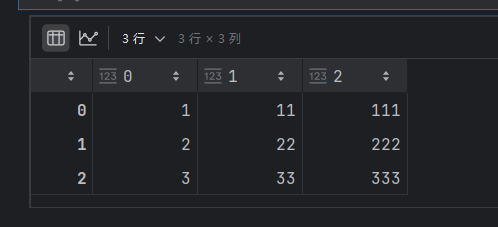

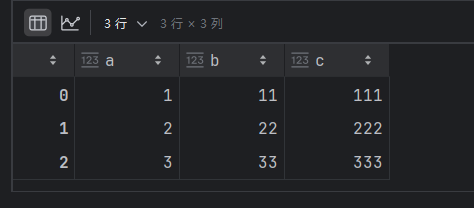

In [6]:
my_list = [
    [1,11,111],
    [2,22,222],
    [3,33,333],
]
df_list = pd.DataFrame(data=my_list)
df_list = pd.DataFrame(data=my_list,columns=['a','b','c'])
df_list


,a,b,c
0,1,11,111
1,2,22,222
2,3,33,333


## 2.3 从numpy数组创建

类似上面，通过columns参数添加列标签

In [7]:
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
my_array = np.array([
    [1,11,111],
    [2,22,222],
    [3,33,333]
])
data_array = pd.DataFrame(data=my_array, columns=['w','x','y'])
data_array

,w,x,y
0,1,11,111
1,2,22,222
2,3,33,333


## 2.4 从series创建

先定义一个series，series是从字典创建的，字典的值被视为一个整体,字典的键最后会成为行索引

In [11]:
my_dict = {'a':[1,11,111],'b':[2,22,222],'c':[3,33,333],'d':[4,44,444],'e':[5,55,555]}

series_dict = pd.Series(my_dict)
series_dict

a    [1, 11, 111]
b    [2, 22, 222]
c    [3, 33, 333]
d    [4, 44, 444]
e    [5, 55, 555]
dtype: object

In [12]:
df_series =series_dict.to_frame()
df_series

,0
a,"[1, 11, 111]"
b,"[2, 22, 222]"
c,"[3, 33, 333]"
d,"[4, 44, 444]"
e,"[5, 55, 555]"


# 3 DataFrame索引

标识每一行的唯一标签

In [33]:
data = {
    'name':['Alice','Quark','baidu'],
    'age':[12,10,3],
    'height':[2,3,4]
}
df_data = pd.DataFrame(data=data)
df_data

,name,age,height
0,Alice,12,2
1,Quark,10,3
2,baidu,3,4


## 3.1 .index:查看索引

In [14]:
df_data.index

RangeIndex(start=0, stop=3, step=1)

## 3.2 .set_index：设置索引

df.set_index(keys, drop=True,inplace=False)

- keys:可以是一个或多个列名,多个列名作为索引传入一个列表
- drop：决定是否删除作为索引的列，True表示删除
- inplace：决定是否在原地修改DataFrame还是返回一个新的DataFrame,默认是生成一个新的，需要赋值

In [36]:
df_data.set_index(keys=['name','age'])
df_data

,name,age,height
0,Alice,12,2
1,Quark,10,3
2,baidu,3,4


In [37]:
df_data.set_index(keys=['name'],drop=True,inplace=True)
df_data

,age,height
name,,
Alice,12,2
Quark,10,3
baidu,3,4


## 3.3 .reset_index:重置为默认索引

df.reset_index(drop=False, inplace=False)

- drop:删除旧索引而不是添加为列
- inplace: 原地修改还是返回一个新的

In [38]:
df_data.reset_index()

,name,age,height
0,Alice,12,2
1,Quark,10,3
2,baidu,3,4


In [39]:
df_data.reset_index().reset_index()

,index,name,age,height
0,0,Alice,12,2
1,1,Quark,10,3
2,2,baidu,3,4


In [41]:
# 删除旧索引不生成新列
df_data.reset_index().reset_index(drop=True)

,name,age,height
0,Alice,12,2
1,Quark,10,3
2,baidu,3,4


# 4 访问DataFrame中的元素


In [54]:
data = {
    'name':['Alice','Quark','baidu','360','google'],
    'age':[12,10,3,3,22],
    'city':['New York','Berg','Westingdon','beijing','sillicon']
}

df_data = pd.DataFrame(data=data)
df_data

,name,age,city
0,Alice,12,New York
1,Quark,10,Berg
2,baidu,3,Westingdon
3,360,3,beijing
4,google,22,sillicon


## 4.1 通过属性访问

直接使用列名作为DataFrame的**属性**

In [43]:
df_data.name

0    Alice
1    Quark
2    baidu
Name: name, dtype: object

## 4.2 通过列名访问

或通过**方括号索引**,可以一次性提供多个列名

In [101]:
df_data[['name','age']]

,name,age
0,Alice,2
1,Quark,2
2,baidu,2
3,360,2
4,google,2
5,SB,2
6,SB,2
8,Tianxuan,2


## 4.3 通过.loc[]访问

df.loc[row_labels,column_labels]

- row_labels: 行**标签**
- column_labels: 列**标签**

> 如果只给一个数字默认是指行

In [46]:
df_data.loc[0,'name']

'Alice'

## 4.4 通过.iloc[]访问

i是index的意思，

df.iloc[row_index,column_index]

- row_index:
- column_index:

> 只给一个数字默认指行索引

In [62]:
df_data.iloc[1,1]

name    Quark
age         5
city     Berg
Name: 1, dtype: object

可以进行切片操作,同列表和元组

df.iloc[start:end:step,start:end:step]

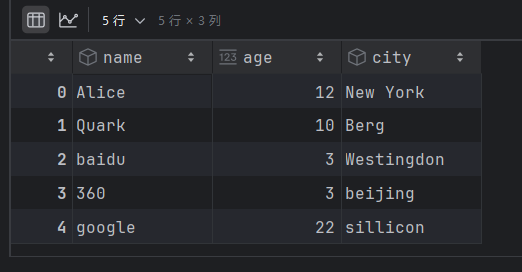
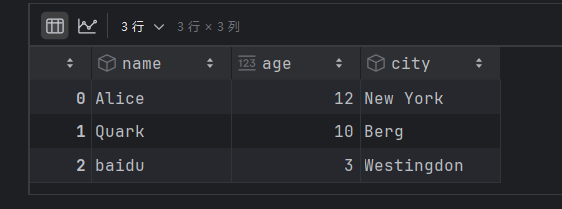

In [49]:
df_data.iloc[1,:]

name    Quark
age        10
city     Berg
Name: 1, dtype: object

In [50]:
df_data.iloc[:,2]

0      New York
1          Berg
2    Westingdon
Name: city, dtype: object

In [53]:
df_data.iloc[::2,::2]

,name,city
0,Alice,New York
2,baidu,Westingdon


## 4.5 根据条件过滤DataFrame

- 根据条件表达式（布尔值）进行，传入的是布尔值而不是索引和标签,只返回布尔值为True的
- 分别传行和列的则过滤可以同时对行列生效

In [56]:
df_data['age'] > 5

0     True
1     True
2    False
3    False
4     True
Name: age, dtype: bool

In [55]:
filter_df = df_data[df_data['age'] > 5]
filter_df

,name,age,city
0,Alice,12,New York
1,Quark,10,Berg
4,google,22,sillicon


# 5 修改DataFrame

## 5.1 修改列数据：直接对列进行赋值

直接在原来的表进行修改，列表长度与DateFrame长度一致
df['columnn] = [element1,element2,...]

In [57]:
data = {
    'name':['Alice','Quark','baidu','360','google'],
    'age':[12,10,3,3,22],
    'city':['New York','Berg','Westingdon','beijing','sillicon']
}

df_data = pd.DataFrame(data=data)
df_data

,name,age,city
0,Alice,12,New York
1,Quark,10,Berg
2,baidu,3,Westingdon
3,360,3,beijing
4,google,22,sillicon


In [89]:
# 添加新列
df_data['telphone'] = 111

In [60]:
df_data['age'] = [1,5,2,0,6]
df_data

,name,age,city
0,Alice,1,New York
1,Quark,5,Berg
2,baidu,2,Westingdon
3,360,0,beijing
4,google,6,sillicon


将一列赋值为一个值

In [81]:
df_data['age'] = 2
df_data

,name,age,city
0,Alice,2,New York
1,Quark,2,Berg
2,baidu,2,Westingdon
3,360,2,beijing
4,google,2,sillicon
5,SB,2,SB
6,SB,2,SB
8,SB,2,SB
sss,SB,2,SB


## 5.2 修改行数据：使用loc方法

df_data.loc[index] = [element1,...]

- index:新行的标签，可以随便写，也可以修改已有的行

> 使用iloc也可以修改**已有**数据，不能添加新行

In [68]:
# 在最后一行添加
df_data.loc['sss'] = ''
df_data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21544\4095195787.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_data.loc['sss'] = ''


,name,age,city
0,Alice,1,New York
1,Quark,5,Berg
2,baidu,2,Westingdon
3,360,0,beijing
4,google,6,sillicon
5,Legion,33,Log Ags
6,Legion,33,Log Ags
8,Legion,33,Log Ags
sss,,,


In [82]:
df_data.iloc[8]= ['Legion',34,'Log Ags']
df_data

,name,age,city
0,Alice,2,New York
1,Quark,2,Berg
2,baidu,2,Westingdon
3,360,2,beijing
4,google,2,sillicon
5,SB,2,SB
6,SB,2,SB
8,SB,2,SB
sss,Legion,34,Log Ags


## 5.3 修改单个元素

使用loc或iloc方法

In [83]:
df_data.loc[8,'name'] = 'Tianxuan'
df_data

,name,age,city
0,Alice,2,New York
1,Quark,2,Berg
2,baidu,2,Westingdon
3,360,2,beijing
4,google,2,sillicon
5,SB,2,SB
6,SB,2,SB
8,Tianxuan,2,SB
sss,Legion,34,Log Ags


In [84]:
df_data.iloc[8,2] = 'Hangzhou'
df_data

,name,age,city
0,Alice,2,New York
1,Quark,2,Berg
2,baidu,2,Westingdon
3,360,2,beijing
4,google,2,sillicon
5,SB,2,SB
6,SB,2,SB
8,Tianxuan,2,SB
sss,Legion,34,Hangzhou


## 5.4 修改满足条件的多个元素

使用过滤加赋值的方法

In [88]:
df_data.iloc[df_data['age'] > 30,1] = 22
df_data

,name,age,city
0,Alice,2,New York
1,Quark,2,Berg
2,baidu,2,Westingdon
3,360,2,beijing
4,google,2,sillicon
5,SB,2,SB
6,SB,2,SB
8,Tianxuan,2,SB
sss,Legion,22,Hangzhou


In [90]:
df_data.loc[df_data['age'] > 30,'age'] = 22
df_data

,name,age,city,telphone
0,Alice,2,New York,111
1,Quark,2,Berg,111
2,baidu,2,Westingdon,111
3,360,2,beijing,111
4,google,2,sillicon,111
5,SB,2,SB,111
6,SB,2,SB,111
8,Tianxuan,2,SB,111
sss,Legion,22,Hangzhou,111


# 6 删除DataFrame元素

## 6.1 使用drop方法删除行或列

主要方法：

- drop(labels,axis=1):axis=1代表删除列
- drop(labels,axis=0):axis=0代表删除行,默认
- df_data.drop(index):行索引
- df_data.drop(columns):列索引
- 参数
    - inplace=True在原地修改,默认False

In [92]:
df_data.drop('telphone',axis=1,inplace=True)
df_data

,name,age,city
0,Alice,2,New York
1,Quark,2,Berg
2,baidu,2,Westingdon
3,360,2,beijing
4,google,2,sillicon
5,SB,2,SB
6,SB,2,SB
8,Tianxuan,2,SB
sss,Legion,22,Hangzhou


In [100]:
df_data.drop(index=5)
df_data.drop(columns=)

,name,age,city
0,Alice,2,New York
1,Quark,2,Berg
2,baidu,2,Westingdon
3,360,2,beijing
4,google,2,sillicon
6,SB,2,SB
8,Tianxuan,2,SB


In [93]:
df_data.drop('sss',axis=0,inplace=True)
df_data

,name,age,city
0,Alice,2,New York
1,Quark,2,Berg
2,baidu,2,Westingdon
3,360,2,beijing
4,google,2,sillicon
5,SB,2,SB
6,SB,2,SB
8,Tianxuan,2,SB


## 6.2 使用del方法

直接在原来的表删除

In [96]:
df_data['telphone'] = 111
df_data

,name,age,city,telphone
0,Alice,2,New York,111
1,Quark,2,Berg,111
2,baidu,2,Westingdon,111
3,360,2,beijing,111
4,google,2,sillicon,111
5,SB,2,SB,111
6,SB,2,SB,111
8,Tianxuan,2,SB,111


In [ ]:
del df_data['telphone']
df_data

In [99]:
# 会报错
del df_data.loc[6]
df_data

AttributeError: __delitem__